In [1]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, HTML

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

## Settings

In [44]:
BASE_DIR = "/home/emerge/daphne/gpudrive/examples/experiments/eval/dataframes/cluster/"

## Helper functions

In [45]:
def make_barplot(data, df, df_random_baseline=None, save_path=None):
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(f'Policy performance on the {data} set', y=1.05)

    # Goal achieved
    sns.barplot(data=df[df['dataset'] == data], errorbar="sd", x='train_dataset_size', y='goal_achieved', ax=axs[0])
    axs[0].set_ylim(0, 1)
    axs[0].grid(True, alpha=0.3)

    # Collided
    sns.barplot(data=df[df['dataset'] == data], errorbar="sd", x='train_dataset_size', y='collided', ax=axs[1])
    axs[1].grid(True, alpha=0.3)

    # Off road
    sns.barplot(data=df[df['dataset'] == data], errorbar="sd", x='train_dataset_size', y='off_road', ax=axs[2])
    axs[2].grid(True, alpha=0.3)
        
    # Random policy performance
    if df_random_baseline is not None:
        rand_pi_mean_gr = df_random_baseline[df_random_baseline['dataset'] == data]['goal_achieved'].mean()
        rand_pi_mean_col = df_random_baseline[df_random_baseline['dataset'] == data]['collided'].mean()
        rand_pi_mean_off = df_random_baseline[df_random_baseline['dataset'] == data]['off_road'].mean()
        
        axs[0].axhline(rand_pi_mean_gr, color='r', linestyle='--', linewidth=2)
        axs[1].axhline(rand_pi_mean_col, color='r', linestyle='--', linewidth=2)
        axs[2].axhline(rand_pi_mean_off, color='r', linestyle='--', linewidth=2, label='Random policy')
        
        axs[1].set_ylim(0, rand_pi_mean_col + 0.05)
        axs[2].set_ylim(0, rand_pi_mean_off + 0.05)
        
    fig.legend()
    plt.tight_layout()

    sns.despine()
    if save_path:
        plt.savefig(save_path)
        
        
def make_histplot(data, df, bins=None, save_path=None):
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(f'Policy performance on the {data} set', y=1.05)

    # Goal achieved
    sns.histplot(data=df[df['dataset'] == data], x='goal_achieved', bins=bins, ax=axs[0])
    axs[0].grid(True, alpha=0.3)

    # Collided
    sns.histplot(data=df[df['dataset'] == data], x='collided', bins=bins, ax=axs[1])
    axs[1].grid(True, alpha=0.3)

    # Off road
    sns.histplot(data=df[df['dataset'] == data], x='off_road', bins=bins, ax=axs[2])
    axs[2].grid(True, alpha=0.3)
        
    fig.legend()
    plt.tight_layout()

    sns.despine()
    if save_path:
        plt.savefig(save_path)

### Load the results

In [46]:
# Test from local machine, trained on 80_000 scenarios
MODEL_1 = "model_PPO__R_80000__01_06_21_53_26_373_007223.csv"

# Good model
MODEL_3 = "model_PPO__R_1000__01_05_20_45_44_827_007000.csv"

# Scaling laws dataframes
df_train_10 = pd.read_csv(BASE_DIR + "model_PPO__S_10__01_07_15_30_45_120_001000.csv")
df_train_100 = pd.read_csv(BASE_DIR + "model_PPO__R_100__01_06_11_16_08_389_003500.csv")
df_train_1000 = pd.read_csv(BASE_DIR + "model_PPO__R_1000__01_06_11_16_08_389_005500.csv")
#df_train_10000 = pd.read_csv(BASE_DIR + "model_PPO__R_10000__01_06_11_16_21_945_012500.csv")
df_rand_baseline = pd.read_csv(BASE_DIR + "random_baseline.csv")

## 1. Aggregate performance

- Aggregate performance train datasets (variable size, equals the data the model is trained on)
- Aggregate performance test dataset (constant size; ~13,000 scenarios)

### 1.1 **Random policy** | Lower bound on performance

In [47]:
tab_rand_baseline = df_rand_baseline.groupby('dataset')[['goal_achieved', 'collided', 'off_road']].agg(['mean', 'std'])
tab_rand_baseline = tab_rand_baseline * 100  
tab_rand_baseline = tab_rand_baseline.round(2)  

tab_rand_baseline

goal_achieved        collided        off_road       
                 mean    std     mean    std     mean    std
dataset                                                     
test            74.27  28.91     8.87  17.25    33.40  33.48
train           24.62  23.48    26.33  26.23    61.97  28.38

### 1.2 Trained in 10 scenarios

In [48]:
tab_train_10 = df_train_10.groupby('dataset')[['goal_achieved', 'collided', 'off_road']].agg(['mean', 'std'])
tab_train_10 = tab_train_10 * 100  
tab_train_10 = tab_train_10.round(2) 

tab_train_10

goal_achieved        collided       off_road      
                 mean    std     mean   std     mean   std
dataset                                                   
test           100.00   0.00      0.0  0.00     3.56  7.53
train           67.81  41.01      1.4  6.28     1.81  4.58

In [49]:
# Sanity check
df_train_10[df_train_10['dataset'] == 'train'].scene.unique().shape

(10,)

### 1.2 Trained in 100 scenarios

In [50]:
tab_train_100 = df_train_100.groupby('dataset')[['goal_achieved', 'collided', 'off_road']].agg(['mean', 'std'])
tab_train_100 = tab_train_100 * 100  
tab_train_100 = tab_train_100.round(2) 

tab_train_100

goal_achieved        collided       off_road      
                 mean    std     mean   std     mean   std
dataset                                                   
test           100.00   0.00     0.17  1.68     0.29  2.08
train           90.23  17.59     1.48  7.94     1.74  8.69

### 1.3 Trained in 1000 scenarios

In [51]:
tab_train_1000 = df_train_1000.groupby('dataset')[['goal_achieved', 'collided', 'off_road']].agg(['mean', 'std'])
tab_train_1000 = tab_train_1000 * 100  
tab_train_1000 = tab_train_1000.round(2) 

tab_train_1000

goal_achieved        collided        off_road       
                 mean    std     mean    std     mean    std
dataset                                                     
test            99.99   0.32     0.08   1.10     0.89   5.14
train           82.14  23.78     4.47  12.99     5.30  12.95

In [52]:
df_all = pd.concat([df_train_10, df_train_100, df_train_1000])
df_all = df_all.reset_index()

df_all

,index,scene,goal_achieved,collided,off_road,controlled_agents_in_scene,dataset,model_name,train_dataset_size
0,0,tfrecord-00000-of-01000_1,1.000000,0.0,0.0,9.0,train,model_PPO__S_10__01_07_15_30_45_120_001000,10
1,1,tfrecord-00000-of-01000_100,1.000000,0.0,0.0,4.0,train,model_PPO__S_10__01_07_15_30_45_120_001000,10
2,2,tfrecord-00000-of-01000_102,0.222222,0.0,0.0,9.0,train,model_PPO__S_10__01_07_15_30_45_120_001000,10
3,3,tfrecord-00000-of-01000_103,0.000000,0.0,0.0,5.0,train,model_PPO__S_10__01_07_15_30_45_120_001000,10
4,4,tfrecord-00000-of-01000_11,0.666667,0.0,0.0,3.0,train,model_PPO__S_10__01_07_15_30_45_120_001000,10
...,...,...,...,...,...,...,...,...,...
2395,1995,tfrecord-00003-of-00150_195,1.000000,0.0,0.0,13.0,test,model_PPO__R_1000__01_06_11_16_08_389_005500,1000
2396,1996,tfrecord-00008-of-00150_211,1.000000,0.0,0.0,3.0,test,model_PPO__R_1000__01_06_11_16_08_389_005500,1000
2397,1997,tfrecord-00000-of-00150_162,1.000000,0.0,0.0,9.0,test,model_PPO__R_1000__01_06_11_16_08_389_005500,1000
2398,1998,tfrecord-00001-of-00150_144,1.000000,0.0,0.0,2.0,test,model_PPO__R_1000__01_06_11_16_08_389_005500,1000


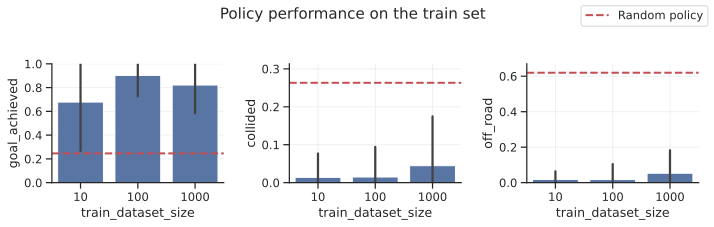

In [53]:
make_barplot(
    data='train',
    df=df_all,
    df_random_baseline=df_rand_baseline,
)

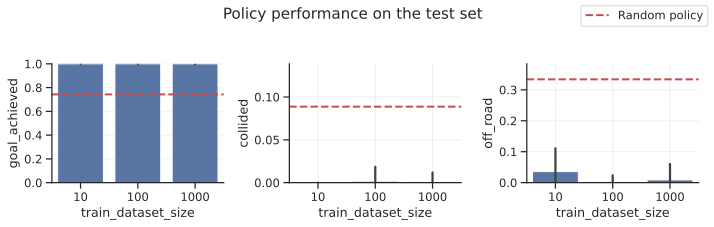

In [56]:
make_barplot(
    data='test',
    df=df_all,
    df_random_baseline=df_rand_baseline,
)

## 2. Error distributions

### 2.1 Metric distributions on train / test data

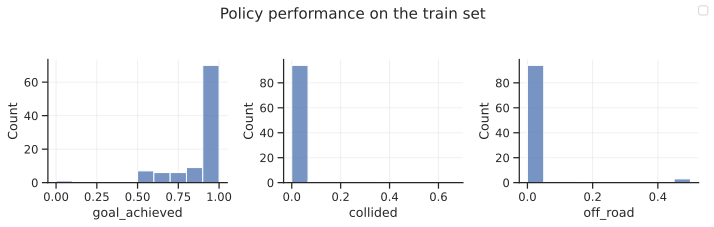

In [57]:
make_histplot(
    data='train',
    df=df_train_100,
    bins=10,
)

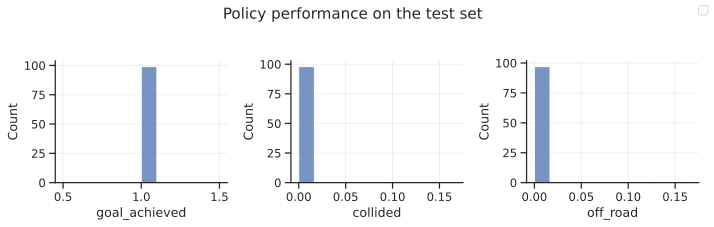

In [58]:
make_histplot(
    data='test',
    df=df_train_100,
    bins=10,
)

### 2.2 Performance x controlled agents in scene 

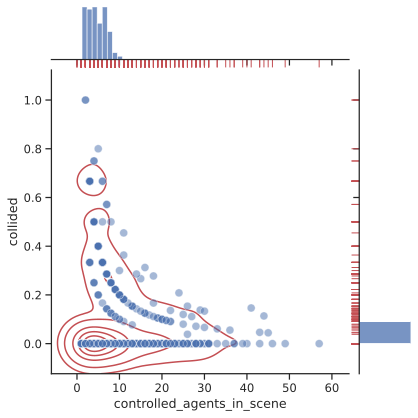

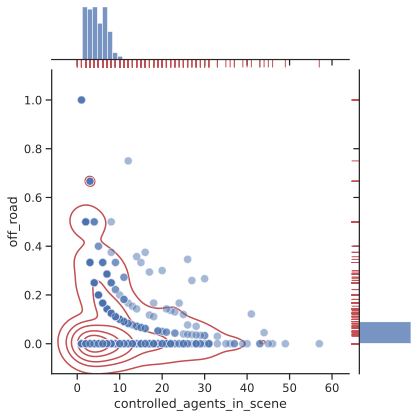

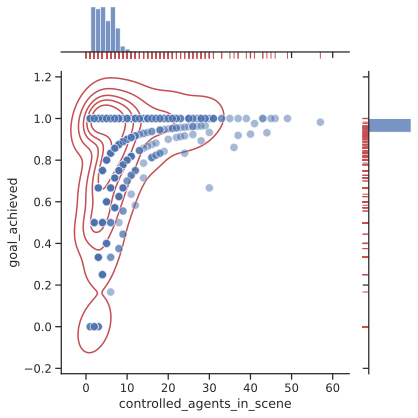

In [59]:
df_subset = df_train_1000[df_train_1000['dataset'] == 'train']

y_columns = ['collided', 'off_road', 'goal_achieved']

for i, y_col in enumerate(y_columns):
    g = sns.jointplot(data=df_subset, x="controlled_agents_in_scene", y=y_col, alpha=0.5)
    g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
    g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

plt.tight_layout() 
plt.show()